# Lab 6.01 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_9276/1793403083.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


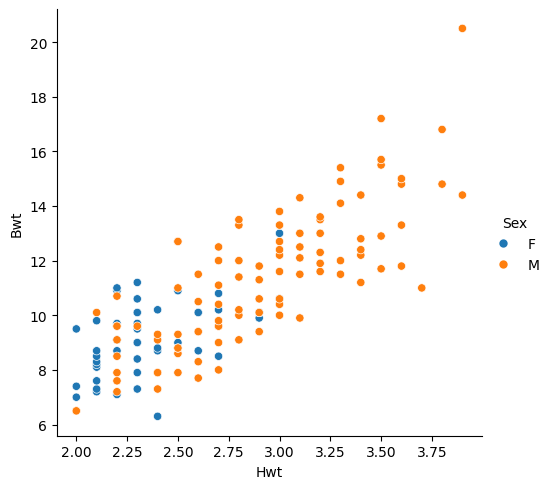

In [3]:
sns.relplot(data=cats,
            x='Hwt', y='Bwt',
            hue='Sex')

3. Calculate and draw the regression line.


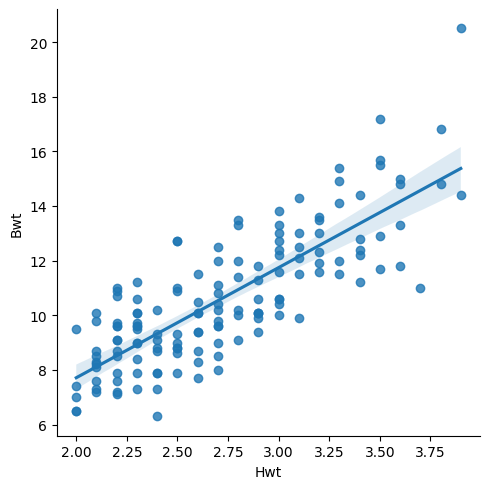

In [4]:
sns.lmplot(data=cats,x='Hwt',y='Bwt')

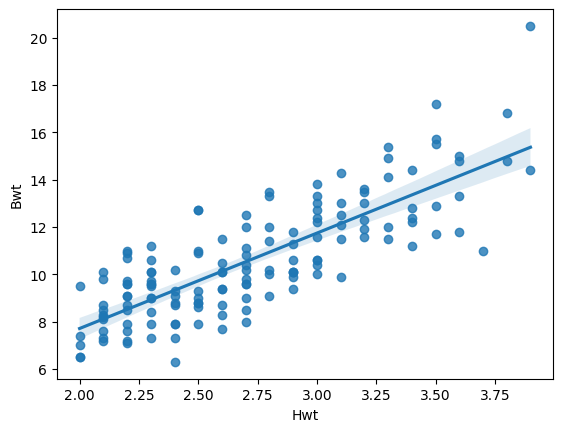

In [5]:
sns.regplot(data=cats,x='Hwt',y='Bwt');

In [6]:
x = cats.Hwt
y = cats['Bwt']
a, b = np.polyfit(x,y,1)
print(f'y={a} * x + {b}')

y=4.031757486783179 * x + -0.3510783771969617


4. Calculate the correlation coefficient and the coefficient of determination.

In [8]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {cor: .4f}")
print(f"R² = {cor ** 2 :.4f}")

R =  0.8041
R² = 0.6466


5. Interpret the results from the previous steps.

In [ ]:
# R > 0 -> Een stijgend verband
# |R| ~ 0.8 => Sterk verband
# R² -> Een sterk verband, waarbij 64% van het gewicht van het hart bepaald wordt door het gewicht van de kat.
# 64% van de variantie van de afhankelijk veranderlijke wordt verklaard door de onafhankelijk veranderlijke

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [9]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


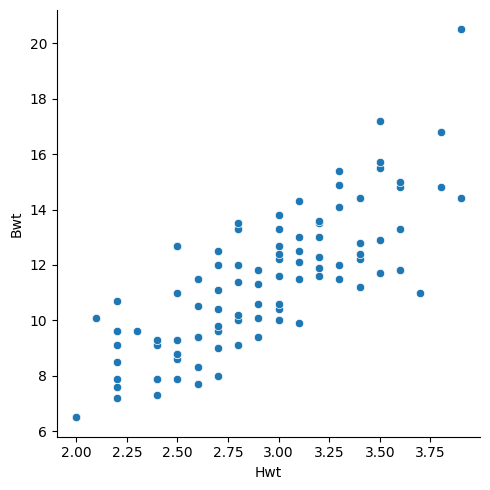

In [13]:
sns.relplot(data=cats[cats.Sex == 'M'], x='Hwt', y='Bwt')

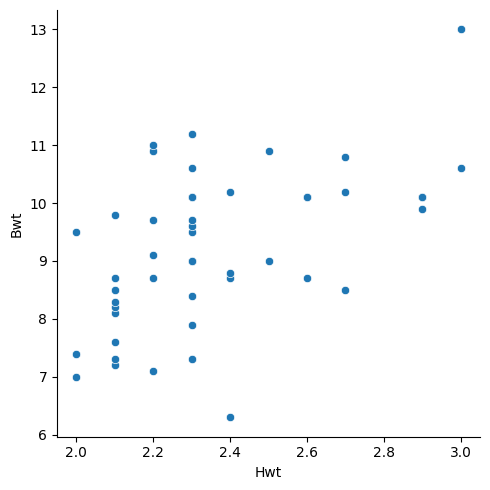

In [14]:
sns.relplot(data=cats[cats.Sex == 'F'], x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


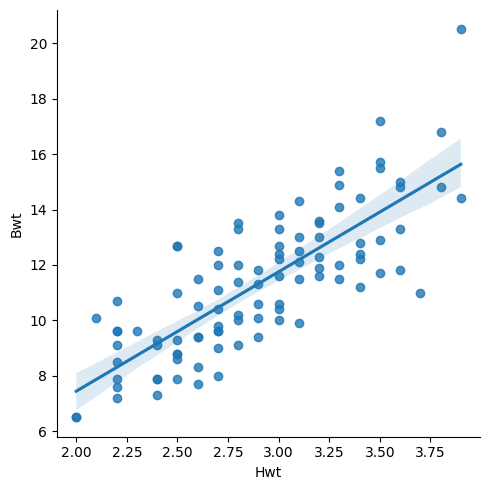

In [15]:
sns.lmplot(data=cats[cats.Sex == 'M'],x='Hwt',y='Bwt')

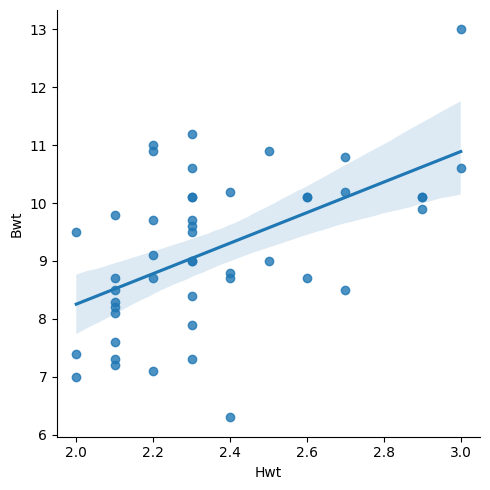

In [16]:
sns.lmplot(data=cats[cats.Sex == 'F'],x='Hwt',y='Bwt')

4. Calculate the correlation coefficient and the coefficient of determination.


In [17]:
x = cats[cats.Sex == 'M'].Hwt
y = cats[cats.Sex == 'M']['Bwt']
a, b = np.polyfit(x,y,1)
print(f'y={a} * x + {b}')

y=4.309818875119162 * x + -1.1768252533094905


In [18]:
x = cats[cats.Sex == 'F'].Hwt
y = cats[cats.Sex == 'F']['Bwt']
a, b = np.polyfit(x,y,1)
print(f'y={a} * x + {b}')

y=2.6364140480591503 * x + 2.981312384473199


5. Interpret the results from the previous steps.

In [19]:
cor = np.corrcoef(cats[cats.Sex == 'M'].Hwt, cats[cats.Sex == 'M'].Bwt)[0][1]
print(f"R = {cor: .4f}")
print(f"R² = {cor ** 2 :.4f}")

R =  0.7930
R² = 0.6289


In [20]:
cor = np.corrcoef(cats[cats.Sex == 'F'].Hwt, cats[cats.Sex == 'F'].Bwt)[0][1]
print(f"R = {cor: .4f}")
print(f"R² = {cor ** 2 :.4f}")

R =  0.5320
R² = 0.2831


In [ ]:
# Voor mannelijke katten
# R > 0 -> Een stijgend verband
# |R| ~ 0.79 => Sterk verband
# R² -> Een sterk verband, waarbij 63% van het gewicht van het hart bepaald wordt door het gewicht van de kat.
# 64% van de variantie van de afhankelijk veranderlijke wordt verklaard door de onafhankelijk veranderlijke

# Voor mannelijke katten
# R > 0 -> Een stijgend verband
# |R| ~ 0.53 => matig verband
# R² -> Een matig verband, waarbij 28% van het gewicht van het hart bepaald wordt door het gewicht van de kat.
# 64% van de variantie van de afhankelijk veranderlijke wordt verklaard door de onafhankelijk veranderlijke

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
